In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def plot_signal(signal, title="Signal"):
    plt.figure(figsize=(10, 4))
    plt.plot(signal)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.show()

def create_embedding(input, delay, embedding_size):
    """
    Create an embedding of the input signal with specified delay and embedding size.

    Parameters:
        input (array-like): 1D input signal
        delay (int): Delay between elements in the embedding
        embedding_size (int): Number of delayed copies (embedding dimension)

    Returns:
        np.ndarray: Time-delay embedded matrix of shape (N, embedding_size)
    """
    input = np.asarray(input)
    n = len(input)
    n_vectors = n - delay * (embedding_size - 1)
    
    if n_vectors <= 0:
        raise ValueError("Input signal is too short for the specified delay and embedding size.")
    
    embedding = np.empty((n_vectors, embedding_size))
    for i in range(embedding_size):
        embedding[:, i] = input[i * delay:i * delay + n_vectors]

    return embedding

def create_dataset(embedded_signal, samples_per_data):
    """
    Create a dataset from the embedded signal with specified samples per data point.

    Parameters:
        embedded_signal (np.ndarray): Time-delay embedded matrix
        samples_per_data (int): Number of samples per data point

    Returns:
        np.ndarray: Dataset of shape (N, samples_per_data, embedding_size)
    """
    n_samples = embedded_signal.shape[0] // samples_per_data
    embedding_size = embedded_signal.shape[1]
    dataset = np.empty((n_samples, samples_per_data * embedding_size))
    
    for i in range(n_samples):
        chunk = embedded_signal[i * samples_per_data:(i + 1) * samples_per_data]
        dataset[i] = chunk.flatten()            
    return dataset

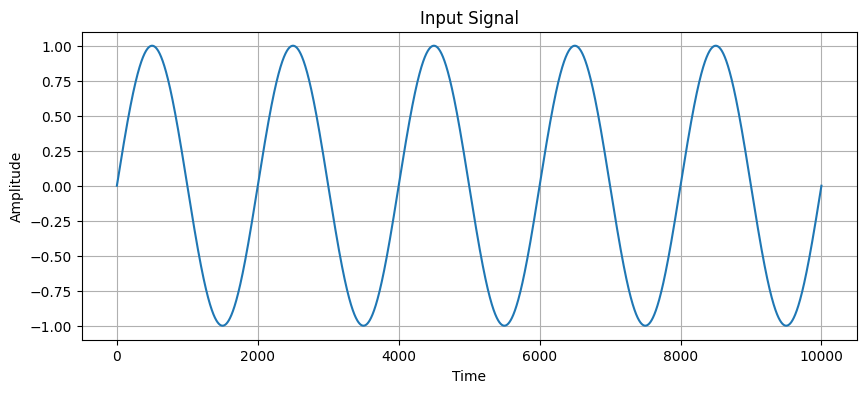

In [4]:
input_signal = np.sin(np.linspace(0, 10 * np.pi, 10000))
plot_signal(input_signal, title="Input Signal")



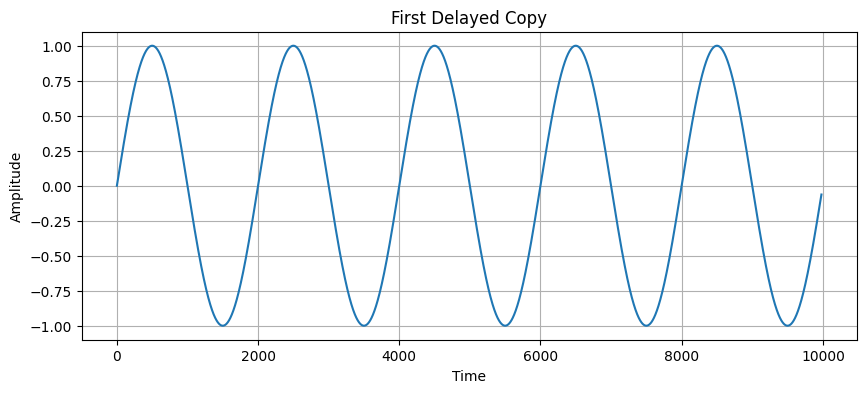

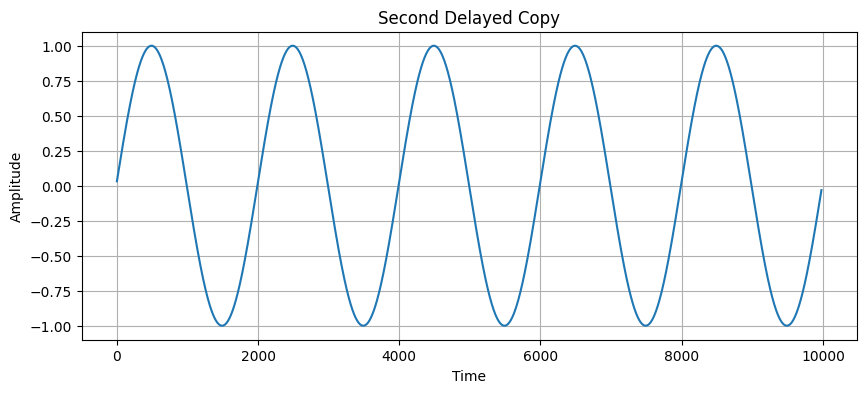

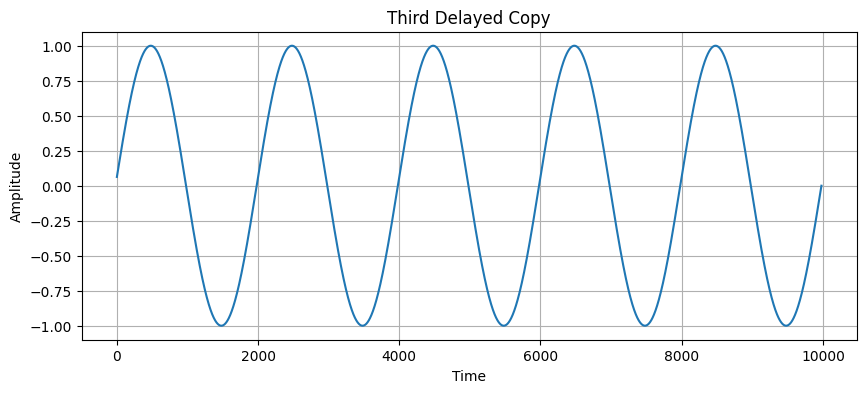

In [5]:
embedding_size = 3
delay = 10
embedded_signal = create_embedding(input_signal, delay, embedding_size)
plot_signal(embedded_signal[:, 0], title="First Delayed Copy")
plot_signal(embedded_signal[:, 1], title="Second Delayed Copy")
plot_signal(embedded_signal[:, 2], title="Third Delayed Copy")

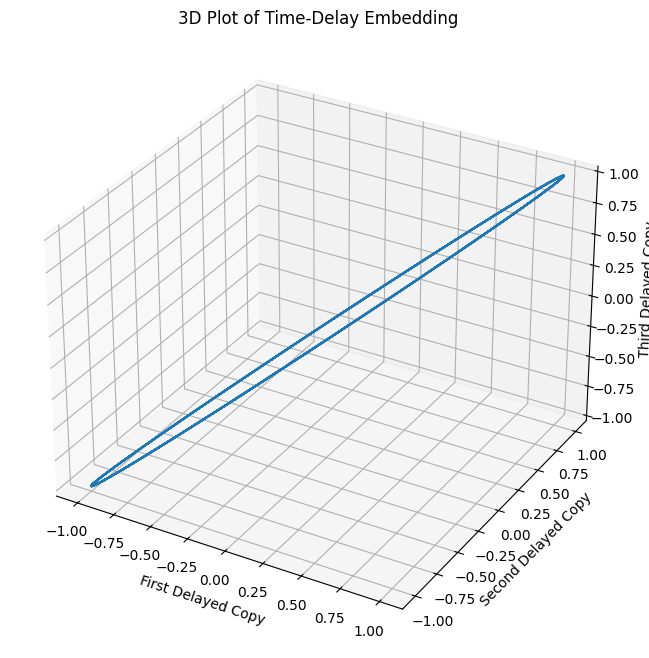

In [6]:
# plot in 3D
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(embedded_signal[:, 0], embedded_signal[:, 1], embedded_signal[:, 2])
ax.set_xlabel('First Delayed Copy')
ax.set_ylabel('Second Delayed Copy')
ax.set_zlabel('Third Delayed Copy')
plt.title("3D Plot of Time-Delay Embedding")
plt.show()

In [7]:
samples_per_data = 32
dataset = create_dataset(embedded_signal, samples_per_data)

print(f"Input Signal Shape: {input_signal.shape}")
print(f"Embedded Signal Shape: {embedded_signal.shape}")
print(f"Dataset Shape: {dataset.shape}")

Input Signal Shape: (10000,)
Embedded Signal Shape: (9980, 3)
Dataset Shape: (311, 96)


In [8]:
class AutoEncoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Linear(input_size, hidden_size)
        self.decoder = nn.Linear(hidden_size, input_size)

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded
    
    def encode(self, x):
        with torch.no_grad():
            return torch.relu(self.encoder(x))

class LSTMAutoEncoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(LSTMAutoEncoder, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.decoder = nn.Linear(hidden_size, input_size)
        
    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        decoded = self.decoder(lstm_out[:, -1, :])
        return decoded
    
    def encode(self, x):
        with torch.no_grad():
            lstm_out, _ = self.lstm(x)
            return torch.relu(lstm_out[:, -1, :])

In [20]:
model = AutoEncoder(input_size=96, hidden_size=3)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)



In [54]:
model = LSTMAutoEncoder(input_size=96, hidden_size=3)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [21]:
num_epochs = 200
for epoch in range(num_epochs):
    model.train()
    for i in range(0, dataset.shape[0]):
        batch = torch.tensor(dataset[i], dtype=torch.float32).unsqueeze(0).unsqueeze(1)  # Add batch dimension
        optimizer.zero_grad()
        outputs = model(batch)
        loss = criterion(outputs, batch)
        loss.backward()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

print("Training complete.")

Epoch [1/200], Loss: 0.0637
Epoch [2/200], Loss: 0.0171
Epoch [3/200], Loss: 0.0048
Epoch [4/200], Loss: 0.0021
Epoch [5/200], Loss: 0.0016
Epoch [6/200], Loss: 0.0015
Epoch [7/200], Loss: 0.0015
Epoch [8/200], Loss: 0.0015
Epoch [9/200], Loss: 0.0016
Epoch [10/200], Loss: 0.0016
Epoch [11/200], Loss: 0.0016
Epoch [12/200], Loss: 0.0016
Epoch [13/200], Loss: 0.0016
Epoch [14/200], Loss: 0.0016
Epoch [15/200], Loss: 0.0016
Epoch [16/200], Loss: 0.0017
Epoch [17/200], Loss: 0.0017
Epoch [18/200], Loss: 0.0017
Epoch [19/200], Loss: 0.0017
Epoch [20/200], Loss: 0.0017
Epoch [21/200], Loss: 0.0017
Epoch [22/200], Loss: 0.0017
Epoch [23/200], Loss: 0.0017
Epoch [24/200], Loss: 0.0017
Epoch [25/200], Loss: 0.0017
Epoch [26/200], Loss: 0.0017
Epoch [27/200], Loss: 0.0017
Epoch [28/200], Loss: 0.0017
Epoch [29/200], Loss: 0.0017
Epoch [30/200], Loss: 0.0017
Epoch [31/200], Loss: 0.0017
Epoch [32/200], Loss: 0.0017
Epoch [33/200], Loss: 0.0016
Epoch [34/200], Loss: 0.0016
Epoch [35/200], Loss: 0

In [22]:
# Collect hidden states for all data points
model.eval()
hidden_states = []

for i in range(dataset.shape[0]):
    batch = torch.tensor(dataset[i], dtype=torch.float32).unsqueeze(0).unsqueeze(1)
    encoded = model.encode(batch)
    hidden_states.append(encoded.numpy())

hidden_states = np.array(hidden_states)

In [23]:
print(hidden_states)

[[[[0.00000000e+00 0.00000000e+00 0.00000000e+00]]]


 [[[1.39766380e-01 0.00000000e+00 0.00000000e+00]]]


 [[[2.89880931e-01 0.00000000e+00 0.00000000e+00]]]


 [[[4.36823010e-01 0.00000000e+00 0.00000000e+00]]]


 [[[5.79108417e-01 0.00000000e+00 0.00000000e+00]]]


 [[[7.15300143e-01 0.00000000e+00 0.00000000e+00]]]


 [[[8.44022453e-01 0.00000000e+00 0.00000000e+00]]]


 [[[9.63975430e-01 0.00000000e+00 0.00000000e+00]]]


 [[[1.07394755e+00 0.00000000e+00 0.00000000e+00]]]


 [[[1.17282832e+00 0.00000000e+00 0.00000000e+00]]]


 [[[1.25961816e+00 0.00000000e+00 0.00000000e+00]]]


 [[[1.33344162e+00 0.00000000e+00 0.00000000e+00]]]


 [[[1.39355242e+00 0.00000000e+00 0.00000000e+00]]]


 [[[1.43934381e+00 0.00000000e+00 0.00000000e+00]]]


 [[[1.47035289e+00 0.00000000e+00 0.00000000e+00]]]


 [[[1.48626673e+00 0.00000000e+00 0.00000000e+00]]]


 [[[1.48692477e+00 0.00000000e+00 0.00000000e+00]]]


 [[[1.47231948e+00 0.00000000e+00 0.00000000e+00]]]


 [[[1.44259989e+00 0.0000000

In [14]:
import plotly.graph_objects as go
import plotly.io as pio

# Force Plotly to render in your system browser
pio.renderers.default = 'browser'

fig = go.Figure(
    data=[go.Scatter3d(
        x=hidden_states[:, ][0],
        y=hidden_states[:, ][1],
        z=hidden_states[:, ][2],
        mode='lines+markers',
        line=dict(color='blue', width=2),
        marker=dict(size=3),
        name='Hidden Trajectory'
    )]
)

fig.update_layout(
    title='3D Hidden State Trajectory',
    scene=dict(
        xaxis_title='H1',
        yaxis_title='H2',
        zaxis_title='H3'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


In [25]:
downsampled_embedding = embedded_signal[:hidden_states.shape[0] * samples_per_data]
downsampled_embedding = downsampled_embedding.reshape(hidden_states.shape[0], samples_per_data, -1)
downsampled_embedding = downsampled_embedding.mean(axis=1)  # Now shape (N', embedding_size)

In [26]:
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'browser'

fig = go.Figure()

# Original embedded signal (e.g. H1 vs H2 vs H3)
fig.add_trace(go.Scatter3d(
    x=downsampled_embedding[:, 0],
    y=downsampled_embedding[:, 1],
    z=downsampled_embedding[:, 2],
    mode='lines+markers',
    marker=dict(size=2, color='gray'),
    name='Original Embedded Signal'
))

# Hidden states
fig.add_trace(go.Scatter3d(
    x=hidden_states[:, 0],
    y=hidden_states[:, 1],
    z=hidden_states[:, 2],
    mode='lines+markers',
    marker=dict(size=2, color='blue'),
    name='Autoencoder Hidden States'
))

fig.update_layout(
    title='Comparison: Embedded Signal vs. Hidden States',
    scene=dict(
        xaxis_title='X',
        yaxis_title='Y',
        zaxis_title='Z'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

fig.show()


IndexError: index 1 is out of bounds for axis 1 with size 1

ValueError: x and y can be no greater than 2D, but have shapes (311,) and (311, 1, 3)

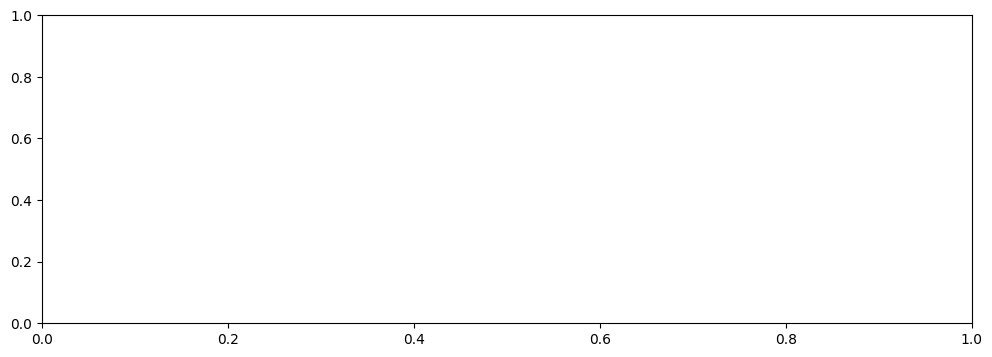

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
for i in range(3):
    plt.plot(hidden_states[:, i], label=f"H{i+1}")
plt.title("Hidden State Components Over Time")
plt.legend()
plt.xlabel("Time Index")
plt.ylabel("Value")
plt.grid(True)
plt.show()


In [52]:
print(model.encoder.weight.data)


tensor([[ 0.0692,  0.0710,  0.1028,  0.1035,  0.0871,  0.0327,  0.0754,  0.1111,
         -0.0132,  0.1101,  0.1192,  0.0364, -0.0220,  0.0735,  0.0930,  0.1076,
         -0.0642,  0.0532,  0.0183,  0.0344,  0.0466,  0.1426,  0.1056,  0.0689,
          0.0837, -0.0306, -0.0150, -0.0533, -0.0527,  0.0124,  0.1157,  0.1039,
         -0.0658,  0.0313,  0.0923, -0.0243,  0.0611,  0.0601, -0.0302,  0.1347,
          0.1098, -0.0404,  0.1067, -0.0053, -0.0952, -0.0081,  0.0764, -0.0434,
          0.0294,  0.1034,  0.0400, -0.0608,  0.0113,  0.0714,  0.0182,  0.0281,
          0.0096,  0.0886, -0.0875,  0.0816,  0.0351, -0.0265,  0.0008,  0.0443,
          0.0391, -0.0346,  0.0966,  0.0542,  0.0347,  0.0446, -0.0811, -0.1182,
         -0.0444,  0.0873, -0.0644, -0.0117, -0.0741, -0.1004,  0.0579,  0.0526,
         -0.0075,  0.0535, -0.0822, -0.0477,  0.0164,  0.0742, -0.1361,  0.0261,
         -0.0026,  0.0209,  0.0746,  0.0123, -0.0691,  0.0018,  0.0417, -0.0245],
        [-0.1372, -0.0613, 